# 14장. 베스트 모델 만들기

<hr>

## 1. 데이터의 확인과 실행

In [1]:
import pandas as pd

In [2]:
df_pre=pd.read_csv('/content/wine.csv',header=None)
df=df_pre.sample(frac=1)

smaple() 함수: 원본 데이터에서 정해진 비율만큼 랜덤으로 뽑아오는 함수 <br>
frac=1은 원본 데이터의 100%를 불러오라는 의미 <br>
frac=0.5는 50%만 랜더므로 불러옴

In [3]:
print(df.head(5))

       0     1     2     3      4     5      6        7     8     9     10  \
951   8.3  0.28  0.48   2.1  0.093   6.0   12.0  0.99408  3.26  0.62  12.4   
2065  7.0  0.14  0.32   9.0  0.039  54.0  141.0  0.99560  3.22  0.43   9.4   
3697  7.4  0.18  0.36  13.1  0.056  72.0  163.0  1.00000  3.42  0.35   9.1   
2281  5.9  0.25  0.25  11.3  0.052  30.0  165.0  0.99700  3.24  0.44   9.5   
4263  6.2  0.21  0.34   6.6  0.030  36.0   91.0  0.99140  3.32  0.45  12.5   

      11  12  
951    7   1  
2065   6   0  
3697   6   0  
2281   6   0  
4263   7   0  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 951 to 1222
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [6]:
dataset=df.values
X=dataset[:,0:12].astype(float)
Y=dataset[:,12]

이항 분류 문제이므로 오차 함수는 binary_crossentropy를, 최적화 함수는 adam()을 사용

### 와인의 종류 예측하기: 데이터 확인과 실행

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
# seed 값 설정
seed=0
np.random.seed(seed)
tf.random.set_seed(3)

In [10]:
# 데이터 입력
df_pre=pd.read_csv('/content/wine.csv',header=None)
df=df_pre.sample(frac=1)
dataset=df.values
X=dataset[:,0:12].astype(float)
Y=dataset[:,12]

In [11]:
# 모델 설정
model=Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
# 모델 실행
model.fit(X,Y,epochs=20,batch_size=20) # 기존 epochs=200, batch_size=200

Epoch 1/20
325/325 [==============================] - 1s 1ms/step - loss: 0.2576 - accuracy: 0.9103
Epoch 2/20
325/325 [==============================] - 0s 1ms/step - loss: 0.1790 - accuracy: 0.9395
Epoch 3/20
325/325 [==============================] - 0s 1ms/step - loss: 0.1558 - accuracy: 0.9469
Epoch 4/20
325/325 [==============================] - 1s 2ms/step - loss: 0.1330 - accuracy: 0.9552
Epoch 5/20
325/325 [==============================] - 1s 2ms/step - loss: 0.1201 - accuracy: 0.9583
Epoch 6/20
325/325 [==============================] - 1s 2ms/step - loss: 0.1006 - accuracy: 0.9664
Epoch 7/20
325/325 [==============================] - 0s 1ms/step - loss: 0.0941 - accuracy: 0.9691
Epoch 8/20
325/325 [==============================] - 0s 1ms/step - loss: 0.0883 - accuracy: 0.9703
Epoch 9/20
325/325 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9721
Epoch 10/20
325/325 [==============================] - 0s 1ms/step - loss: 0.0842 - accuracy: 0.9732

In [14]:
# 결과 출력
print("\n Accuracy: %.4f" %(model.evaluate(X,Y)[1]))

204/204 [==============================] - 0s 1ms/step - loss: 0.0619 - accuracy: 0.9812

 Accuracy: 0.9812


<hr>

## 2. 모델 업데이트하기

In [15]:
import os

MODEL_DIR='./model/' # 모델을 저장하는 폴더
if not os.path.exists(MODEL_DIR): # 만일 위의 폴더가 존재하지 않으면
  os.mkdir(MODEL_DIR) # 이 이름의 폴더를 만들어 줌

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [16]:
from keras.callbacks import ModelCheckpoint

모델이 저장될 곳을 modelpath로 지정하고, verbose의 값을 1로 정하면 진행 사항이 출력되고, 0으로 정하면 출력되지 않음

In [20]:
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss', verbose=1)

In [21]:
model.fit(X,Y,validation_split=0.2,epochs=20,batch_size=20,
          verbose=0, callbacks=[checkpointer]) # 기존 epochs=200, batch_size=200


Epoch 1: saving model to ./model/01-0.0724.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to ./model/02-0.0870.hdf5

Epoch 3: saving model to ./model/03-0.0685.hdf5

Epoch 4: saving model to ./model/04-0.1010.hdf5

Epoch 5: saving model to ./model/05-0.0567.hdf5

Epoch 6: saving model to ./model/06-0.0847.hdf5

Epoch 7: saving model to ./model/07-0.0551.hdf5

Epoch 8: saving model to ./model/08-0.0511.hdf5

Epoch 9: saving model to ./model/09-0.1058.hdf5

Epoch 10: saving model to ./model/10-0.0956.hdf5

Epoch 11: saving model to ./model/11-0.0551.hdf5

Epoch 12: saving model to ./model/12-0.0658.hdf5

Epoch 13: saving model to ./model/13-0.0554.hdf5

Epoch 14: saving model to ./model/14-0.0567.hdf5

Epoch 15: saving model to ./model/15-0.0633.hdf5

Epoch 16: saving model to ./model/16-0.0658.hdf5

Epoch 17: saving model to ./model/17-0.0542.hdf5

Epoch 18: saving model to ./model/18-0.0475.hdf5

Epoch 19: saving model to ./model/19-0.0515.hdf5

Epoch 20: saving model to ./model/20-0.0481.hdf5


ModelCheckpoint() 함수에 모델이 앞서 저장한 모델보다 나아졌을 때만 저장하려면, <br>
save_best_only값을 True로 지정하면 됨

In [22]:
checkpointer=ModelCheckpoint(filepath=modelpath, moniter='val_loss',
                             verbose=1, save_best_only=True)

### 와인의 종류 예측하기: 모델 업데이트 <br>
(중략)

In [23]:
# 모델 저장 폴더 설정
MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer=ModelCheckpoint(filepath=modelpath, moniter='val_loss',
                             verbose=1, save_best_only=True)

# 모델 실행 및 저장
model.fit(X,Y,validation_split=0.2, epochs=20, batch_size=20,
          verbose=0, callbacks=[checkpointer]) # 기존 epochs=200, batch_size=200


Epoch 1: val_loss improved from inf to 0.05310, saving model to ./model/01-0.0531.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss did not improve from 0.05310

Epoch 3: val_loss did not improve from 0.05310

Epoch 4: val_loss did not improve from 0.05310

Epoch 5: val_loss improved from 0.05310 to 0.04899, saving model to ./model/05-0.0490.hdf5

Epoch 6: val_loss did not improve from 0.04899

Epoch 7: val_loss did not improve from 0.04899

Epoch 8: val_loss did not improve from 0.04899

Epoch 9: val_loss did not improve from 0.04899

Epoch 10: val_loss did not improve from 0.04899

Epoch 11: val_loss did not improve from 0.04899

Epoch 12: val_loss did not improve from 0.04899

Epoch 13: val_loss did not improve from 0.04899

Epoch 14: val_loss did not improve from 0.04899

Epoch 15: val_loss did not improve from 0.04899

Epoch 16: val_loss did not improve from 0.04899

Epoch 17: val_loss did not improve from 0.04899

Epoch 18: val_loss improved from 0.04899 to 0.04576, saving model to ./model/18-0.0458.hdf5

Epoch 19: val_loss did not improve from 0.04576

Epoch 20: val_loss did not improve fr

<hr>

## 3. 그래프로 확인하기

In [26]:
df=df_pre.sample(frac=0.15)
# 모델 실행 및 저장
history=model.fit(X,Y,validation_split=0.33, epochs=3500, batch_size=500)
                                            # 기존 epochs=3500, batch_size=500

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
9/9 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.9943 - val_loss: 0.0353 - val_accuracy: 0.9930
Epoch 1002/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0203 - accuracy: 0.9943 - val_loss: 0.0356 - val_accuracy: 0.9916
Epoch 1003/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0344 - val_accuracy: 0.9935
Epoch 1004/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0206 - accuracy: 0.9936 - val_loss: 0.0346 - val_accuracy: 0.9935
Epoch 1005/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0193 - accuracy: 0.9947 - val_loss: 0.0353 - val_accuracy: 0.9935
Epoch 1006/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0206 - accuracy: 0.9931 - val_loss: 0.0361 - val_accuracy: 0.9939
Epoch 1007/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0358 - 

In [49]:
import matplotlib.pyplot as plt
# y_vloss에 테스트셋으로 실험결과의 오차 값을 저장
y_vloss=history.history['val_loss'] # 테스트셋(33%)으로 실험한 결과의 오차 값을 저장
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc=history.history['accuracy'] # 학습셋(67%)으로 측정한 정확도의 값을 저장

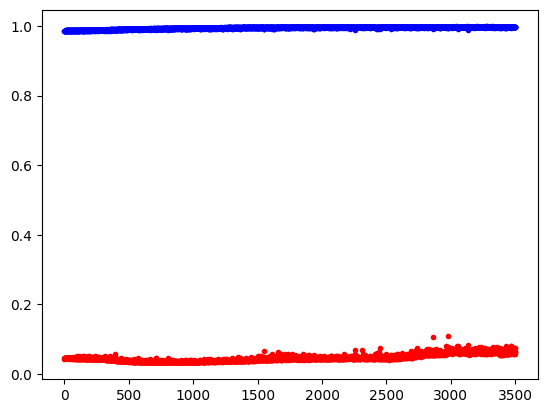

In [51]:
# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 시
x_len=np.arange(len(y_acc))
plt.plot(x_len,y_vloss,"o",c="red",markersize=3) # 오차를 빨간색으로 표시
plt.plot(x_len,y_acc,"o",c="blue",markersize=3) # 정확도를 파란색으로 표시

plt.show()

<hr>

## 4. 학습의 자동 중단

EarlyStopping() 함수: 테스트셋 오차가 줄지 않으면 학습을 멈추게 하는 함수

In [29]:
from keras.callbacks import EarlyStopping

In [30]:
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=100)

In [33]:
model.fit(X, Y, validation_split=0.33, epochs=20, batch_size=50,
          callbacks=[early_stopping_callback]) # 기존 epochs=2000, batch_size=500

Epoch 1/20
88/88 [==============================] - 0s 4ms/step - loss: 0.0863 - accuracy: 0.9825 - val_loss: 0.0742 - val_accuracy: 0.9897
Epoch 2/20
88/88 [==============================] - 0s 4ms/step - loss: 0.0919 - accuracy: 0.9835 - val_loss: 0.1185 - val_accuracy: 0.9706
Epoch 3/20
88/88 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9846 - val_loss: 0.0466 - val_accuracy: 0.9916
Epoch 4/20
88/88 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9832 - val_loss: 0.0392 - val_accuracy: 0.9921
Epoch 5/20
88/88 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9899 - val_loss: 0.0383 - val_accuracy: 0.9907
Epoch 6/20
88/88 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9906 - val_loss: 0.0816 - val_accuracy: 0.9846
Epoch 7/20
88/88 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.9908 - val_loss: 0.0395 - val_accuracy: 0.9911
Epoch 8/20
88/88 [==

### 와인의 종류 예측하기: 학습의 자동 중단 → 전체 코드

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [44]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf

In [34]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [35]:
df_pre=pd.read_csv('/content/wine.csv',header=None)
df=df_pre.sample(frac=0.15)

dataset=df.values
X=dataset[:,0:12].astype(float)
Y=dataset[:,12]

In [38]:
# 모델 설정
model=Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [45]:
# 모델 저장 폴더 만들기
MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 저장 조건 설정
checkpointer=ModelCheckpoint(filepath=modelpath, moniter='val_loss',
                             verbose=1, save_best_only=True)

In [39]:
# 학습 자동 중단 설정
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=100)

In [46]:
# 모델 실행
model.fit(X,Y,validation_split=0.2,epochs=35,batch_size=50, verbose=0,
          callbacks=[early_stopping_callback, checkpointer])
            # 기존 epochs=2000, batch_size=500


Epoch 1: val_loss improved from inf to 0.15310, saving model to ./model/01-0.1531.hdf5

Epoch 2: val_loss improved from 0.15310 to 0.14567, saving model to ./model/02-0.1457.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss improved from 0.14567 to 0.14414, saving model to ./model/03-0.1441.hdf5

Epoch 4: val_loss did not improve from 0.14414

Epoch 5: val_loss did not improve from 0.14414

Epoch 6: val_loss improved from 0.14414 to 0.13969, saving model to ./model/06-0.1397.hdf5

Epoch 7: val_loss did not improve from 0.13969

Epoch 8: val_loss improved from 0.13969 to 0.13713, saving model to ./model/08-0.1371.hdf5

Epoch 9: val_loss did not improve from 0.13713

Epoch 10: val_loss did not improve from 0.13713

Epoch 11: val_loss improved from 0.13713 to 0.13177, saving model to ./model/11-0.1318.hdf5

Epoch 12: val_loss did not improve from 0.13177

Epoch 13: val_loss improved from 0.13177 to 0.12772, saving model to ./model/13-0.1277.hdf5

Epoch 14: val_loss did not improve from 0.12772

Epoch 15: val_loss did not improve from 0.12772

Epoch 16: val_loss did not improve from 0.12772

Epoch 17: val_loss did not improve from 0.12772

Epoch 18: val_loss improved from 0.12772 to 0.12408

In [47]:
# 결과 출력
print("\n Accuracy: %.4f" %(model.evaluate(X,Y)[1]))

31/31 [==============================] - 0s 1ms/step - loss: 0.1543 - accuracy: 0.9631

 Accuracy: 0.9631
